<a href="https://colab.research.google.com/github/Justabhi96/advanced_computer_vision/blob/master/06_Object_Localization_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make the pokemon of different sizes

In [0]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.1.0


In [0]:
!wget -nc https://lazyprogrammer.me/course_files/charmander-tight.png

File ‘charmander-tight.png’ already there; not retrieving.



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.preprocessing import image

In [0]:
IMAGE_SIZE = [200, 200, 3]

In [0]:
vgg = VGG16(input_shape = IMAGE_SIZE, weights = "imagenet", include_top = False)

x = Flatten()(vgg.output)
x = Dense(4, activation = "sigmoid")(x)
model = Model(vgg.input, x)

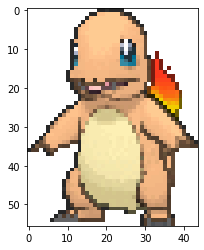

In [0]:
ch_image = imageio.imread("charmander-tight.png")
plt.imshow(ch_image)

In [0]:
ch_image = np.array(ch_image)
ch_h, ch_w, _ = ch_image.shape
ch_h, ch_w

(56, 44)

In [0]:
from skimage.transform import resize
import cv2

def image_generator(batch_size=64):
  # generate image and targets
  while True:
    # Each epoch will have 50 batches. Why? No reason
    for _ in range(50):
      X = np.zeros([batch_size] + IMAGE_SIZE)
      Y = np.zeros([batch_size, 4])

      for i in range(batch_size):
        # to make charmander bigger or smaller
        scale = 0.5 + np.random.random() #[0.5, 1.5]
        new_h = int(ch_h * scale)
        new_w = int(ch_w * scale)
        new_ch_img = resize(ch_image, (new_h, new_w), 
                            preserve_range=True).astype(np.uint8) # to keep the range 0 - 255
        row0 = np.random.randint(0, IMAGE_SIZE[0] - new_h)
        col0 = np.random.randint(0, IMAGE_SIZE[0] - new_w)
        row1 = row0 + new_h
        col1 = col0 + new_w

        X[i, row0:row1, col0:col1, :] = new_ch_img[:,:,:3]
        Y[i, 0] = row0/IMAGE_SIZE[0]
        Y[i, 1] = col0/IMAGE_SIZE[0]
        Y[i, 2] = (col1-col0)/IMAGE_SIZE[0]
        Y[i, 3] = (row1-row0)/IMAGE_SIZE[0]

      yield X/255.0, Y

In [0]:
# Notice learning rate is 10th of previous netebook
model.compile(optimizer=Adam(lr = 0.0001), loss = "binary_crossentropy")
model.fit_generator(image_generator(), epochs = 5, steps_per_epoch=50)

  ...
    to  
  ['...']
Train for 50 steps
Epoch 1/5
50/50 [==============================] - 28s 569ms/step - loss: 0.5542
Epoch 2/5
50/50 [==============================] - 19s 374ms/step - loss: 0.5468
Epoch 3/5
50/50 [==============================] - 19s 374ms/step - loss: 0.5438
Epoch 4/5
50/50 [==============================] - 19s 378ms/step - loss: 0.5426
Epoch 5/5
50/50 [==============================] - 19s 375ms/step - loss: 0.5458


In [0]:
from matplotlib.patches import Rectangle
ref_size = IMAGE_SIZE[0]

def make_prediction():
  # to make charmander bigger or smaller
  scale = 0.5 + np.random.random() #[0.5, 1.5]
  new_h = int(ch_h * scale)
  new_w = int(ch_w * scale)
  new_ch_img = resize(ch_image, (new_h, new_w), 
                      preserve_range=True).astype(np.uint8) # to keep the range 0 - 255
  row0 = np.random.randint(0, ref_size - new_h)
  col0 = np.random.randint(0, ref_size - new_w)
  row1 = row0 + new_h
  col1 = col0 + new_w
  x = np.zeros(IMAGE_SIZE)
  x[row0:row1, col0:col1, :] = new_ch_img[:,:,:3]

  X = np.expand_dims(x, 0)
  p = model.predict(X/255.0)[0]
  print((p[0]*ref_size, p[1]*ref_size, p[2]*ref_size, p[3]*ref_size))
  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  rect = Rectangle((p[1]*ref_size, p[0]*ref_size), 
                   p[2]*ref_size, p[3]*ref_size, 
                   linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect)
  plt.show()

(98.2366681098938, 134.2366337776184, 53.61202359199524, 67.91821122169495)


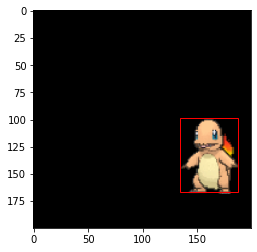

In [0]:
make_prediction()